# Census Income Project

Problem Statement:


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

Columns:

    1. Age
    
    2. Workclass
    
    3. Fnlwgt
    
    4. Education
    
    5. Education_num
    
    6. Marital_Status
    
    7. Occupation
    
    8. Relationship
    
    9. Race
    
    10. Sex
    
    11. Capital_gain
    
    12. Capital_loss
    
    13. Hours_per_week
    
    14. Native_Country
    
    15. Income

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

There is no null data so we can further continue analysis

In [6]:
collist = df.columns.values

for i in collist:
    print(f"Value Count of {i} \n is {df[i].value_counts()}\n")

Value Count of Age 
 is 36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64

Value Count of Workclass 
 is  Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

Value Count of Fnlwgt 
 is 164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64

Value Count of Education 
 is  HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Docto

We have '?' in 'Workclass', 'Occupation', 'Native_country'

'Capital_gain', 'Capital_loss' has most 0's in the column so we can drop those two columns

In [7]:
df['Workclass'].mode()

0     Private
dtype: object

Workclass has more 'Private' so will replace '?' with 'Private'

In [8]:
df['Workclass'] = df.Workclass.str.replace('?','Private')

In [9]:
df['Workclass'].value_counts()

 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [10]:
df['Occupation'].mode()

0     Prof-specialty
dtype: object

we have more 'Prof-specialty' so will replace '?' with 'Prof-specialty'

In [11]:
df['Occupation'] = df.Occupation.str.replace('?','Prof-speciality')

In [12]:
df['Native_country'].mode()

0     United-States
dtype: object

In [13]:
df['Native_country'] = df.Native_country.str.replace('?','Native_country')

    Now all '?' is replace with values

In [14]:
df.drop(['Capital_loss','Capital_gain'],axis=1,inplace=True)

# Checking for categorical columns

In [15]:
col = df.columns
numeric_col = df._get_numeric_data().columns
cat_col = list(set(col)-set(numeric_col))
cat_col


['Native_country',
 'Workclass',
 'Sex',
 'Education',
 'Race',
 'Income',
 'Relationship',
 'Marital_status',
 'Occupation']

In [16]:
numeric_col

Index(['Age', 'Fnlwgt', 'Education_num', 'Hours_per_week'], dtype='object')

Now lets drop 'Capital_loss', 'Capital_gain' column

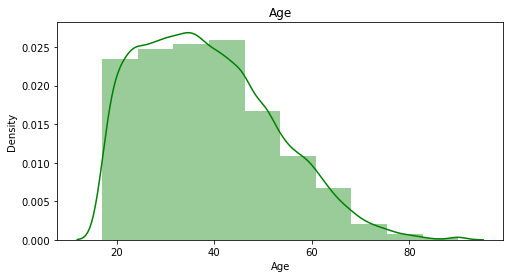

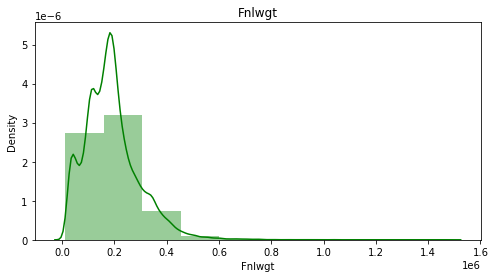

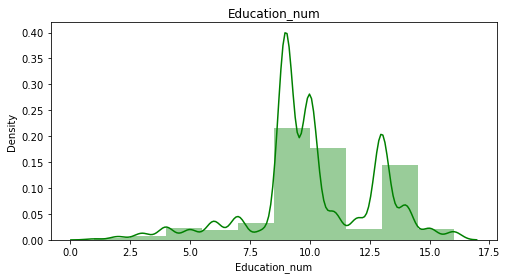

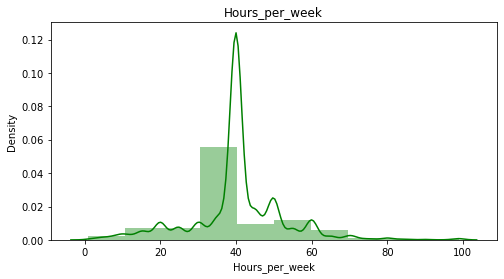

In [17]:
#Distribution plot for all numerical columns
for i in numeric_col:              
    plt.figure(figsize = (8, 4))
    sns.distplot(df[i], bins = 10, color="g")
    plt.title(i)
    plt.show()

Key Observations:

We can see that 'Age' has less skewness and all other columns have high skewness.

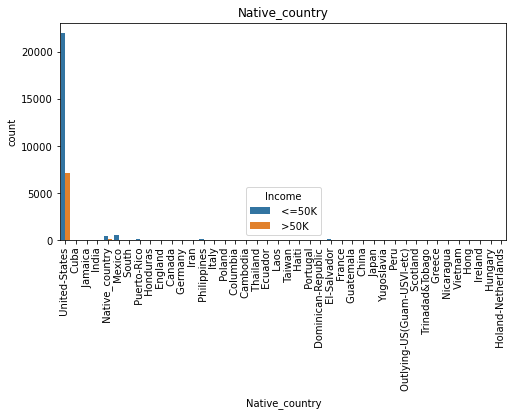

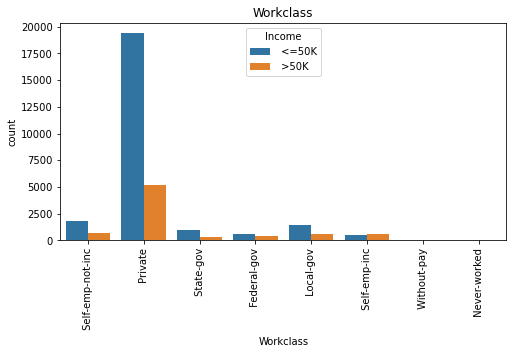

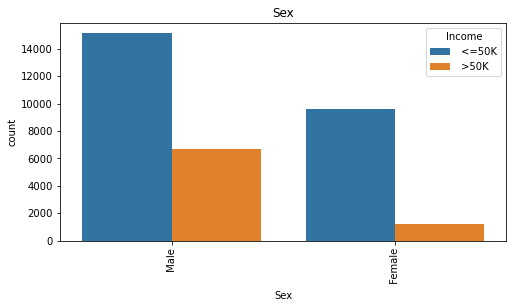

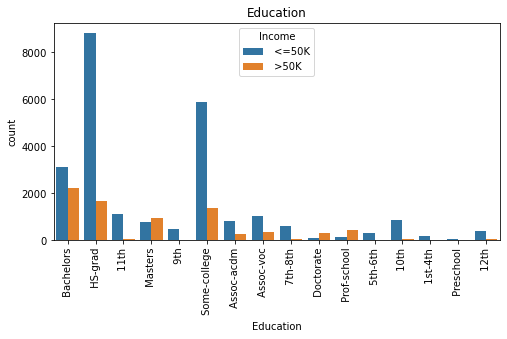

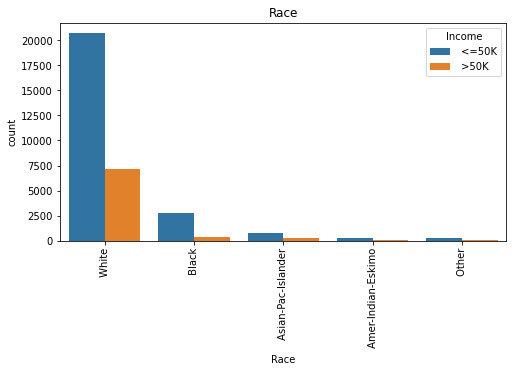

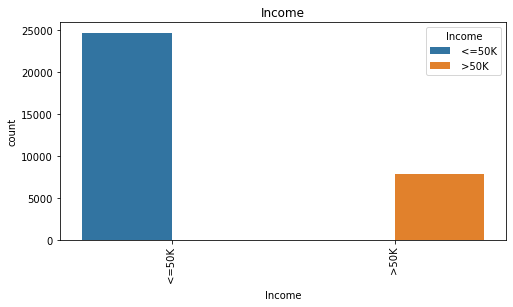

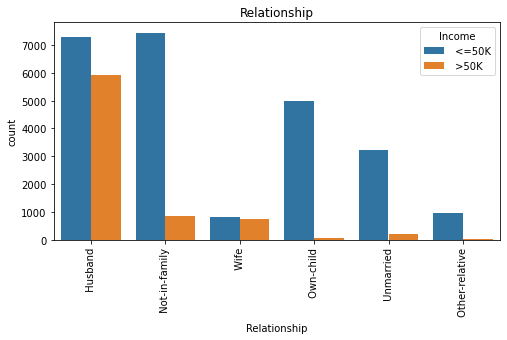

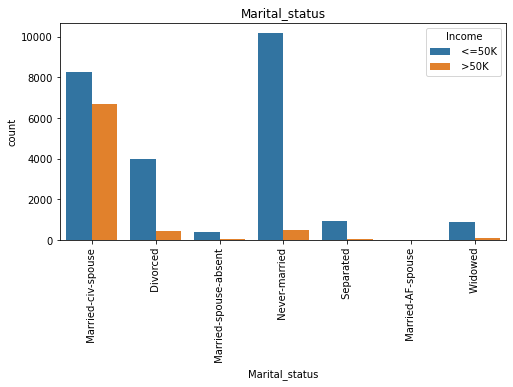

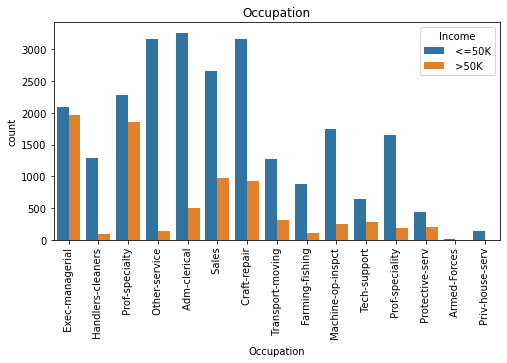

In [18]:
for i in cat_col:
    plt.figure(figsize=(8,4))
    sns.countplot(x = df[i],data=df,hue='Income')
    plt.title(i)
    plt.xticks(rotation=90)
    plt.show()

Key Observation:

1. More number of people earn less than or equal to 50000
2. People working in private sector earn more income compare to all other sectors.
3. People with Bachelores,HS-grade and Some college education earn more income compare to all other category people.
4. maxium number of Married with spouse earn more than 50000.More number of never married people earn less than or equal to 50000 compare to all others
5. In the occupations exec-managerial and prof-specialty almost equal number of people earn less than or equal to 50000 and more than 50000.In rest of the occupations more number people earn less than or equal to 50000
6. White people earn far more than any other race people.
7. Native people of US earn far more than any other country people.
8. Male earn more than females.

In [19]:
#converting to str datatype
df['Race']=df['Race'].astype(str)
df['Sex'] = df['Sex'].astype(str)
df['Education'] = df['Education'].astype(str)
df['Occupation'] = df['Occupation'].astype(str)
df['Native_country'] = df['Native_country'].astype(str)
df['Marital_status'] = df['Marital_status'].astype(str)
df['Workclass'] = df['Workclass'].astype(str)
df['Income'] = df['Income'].astype(str)
df['Relationship'] = df['Relationship'].astype(str)

# Now lets convert all categorical column to numeric by using Label Encoder

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat_col:
    df[i]=le.fit_transform(df[i])

# Describe

In [21]:
df.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.094349,1.897818e+05,10.298249,10.080590,2.611794,6.475676,1.446376,3.665848,0.669195,40.437469,37.121161,0.240817
std,13.640642,1.107094,1.055498e+05,3.870317,2.572709,1.506225,4.357023,1.606794,0.848817,0.470510,12.347618,6.451893,0.427586
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,3.000000,1.178315e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,3.000000,1.783630e+05,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,40.000000,39.000000,0.000000
75%,48.000000,3.000000,2.370545e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,45.000000,39.000000,0.000000
max,90.000000,7.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99.000000,41.000000,1.000000


Key Observations:

1.By this we can infer that skewness is present in few columns.

2. And Outliers are present in 'Age','Hours_per_week' column.

we will conform this by visualization method and will remove

# correlation:

In [22]:
df.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
Age,1.000000,0.040506,-0.076646,-0.010508,0.036527,-0.266292,0.004124,-0.263698,0.028718,0.088832,0.068756,0.000126,0.234039
Workclass,0.040506,1.000000,-0.024255,0.004901,0.003445,-0.020545,0.006143,-0.057931,0.048323,0.071535,0.042206,-0.003062,0.002739
Fnlwgt,-0.076646,-0.024255,1.000000,-0.028156,-0.043159,0.028184,-0.000108,0.008922,-0.021278,0.026882,-0.018770,-0.064173,-0.009481
Education,-0.010508,0.004901,-0.028156,1.000000,0.359172,-0.038398,-0.032300,-0.010879,0.014135,-0.027349,0.055510,0.077403,0.079311
Education_num,0.036527,0.003445,-0.043159,0.359172,1.000000,-0.069338,0.095735,-0.094145,0.031825,0.012256,0.148127,0.081417,0.335182
Marital_status,-0.266292,-0.020545,0.028184,-0.038398,-0.069338,1.000000,0.028312,0.185461,-0.068025,-0.129337,-0.190521,-0.023939,-0.199295
Occupation,0.004124,0.006143,-0.000108,-0.032300,0.095735,0.028312,1.000000,-0.042996,-0.001185,0.048325,-0.002206,-0.001755,0.048291
Relationship,-0.263698,-0.057931,0.008922,-0.010879,-0.094145,0.185461,-0.042996,1.000000,-0.116052,-0.582453,-0.248975,-0.009045,-0.250924
Race,0.028718,0.048323,-0.021278,0.014135,0.031825,-0.068025,-0.001185,-0.116052,1.000000,0.087197,0.041910,0.131846,0.071853
Sex,0.088832,0.071535,0.026882,-0.027349,0.012256,-0.129337,0.048325,-0.582453,0.087197,1.000000,0.229312,-0.002418,0.215995


<AxesSubplot:>

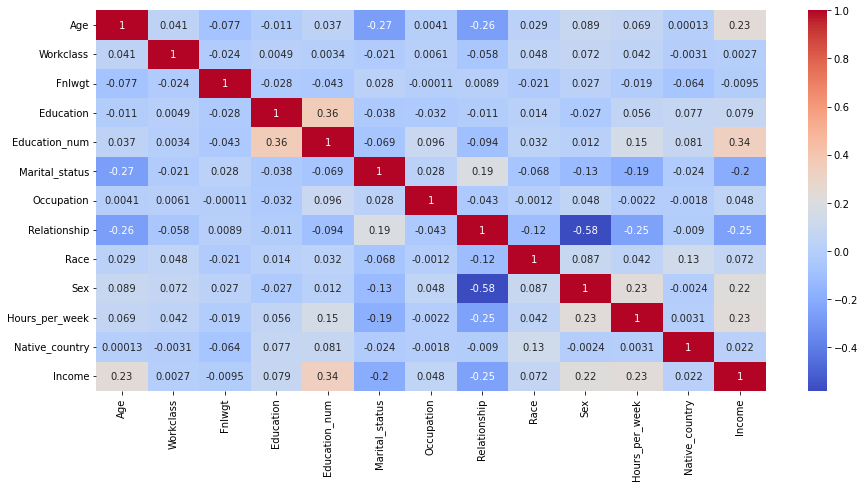

In [23]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

Key Observations:

Positive correlation:
    
    'Education_num'
    'Age'
    'Hours_per_week'
    'Sex'
    'Education'
    'Work_class'
    'Race'
    'Native_country'
    
    

Negative correlation:
    
    'Relationship'
    'MaritalStatus'
    'Fnlwgt'

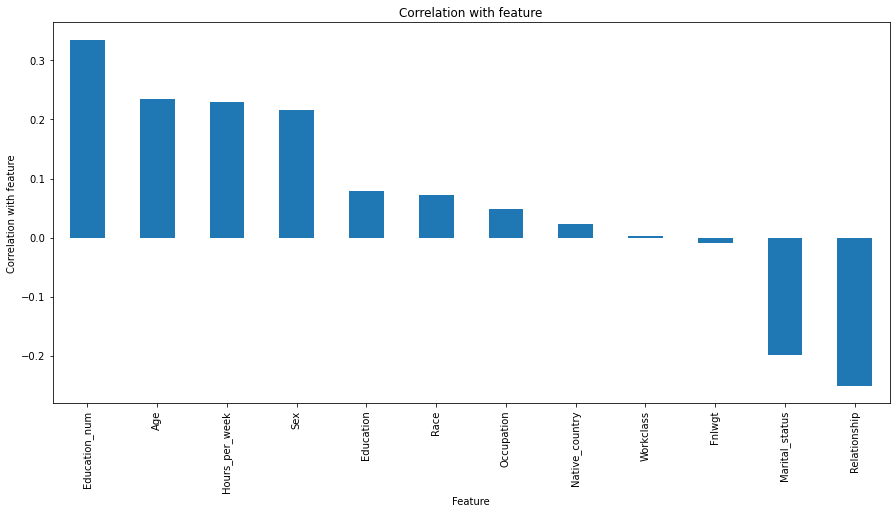

In [24]:
plt.figure(figsize=(15,7))
df.corr()['Income'].sort_values(ascending=False).drop(['Income']).plot.bar()
plt.xlabel('Feature')
plt.ylabel('Correlation with feature')
plt.title("Correlation with feature")
plt.show()

It is true that Education is highly correlated with Income whereas 'Relationship' does not have much contribution in Income

# Skewness

In [25]:
df.skew()

Age               0.558738
Workclass         0.076178
Fnlwgt            1.446972
Education        -0.934063
Education_num    -0.311630
Marital_status   -0.013448
Occupation        0.090052
Relationship      0.786784
Race             -2.435332
Sex              -0.719244
Hours_per_week    0.227636
Native_country   -3.861695
Income            1.212383
dtype: float64

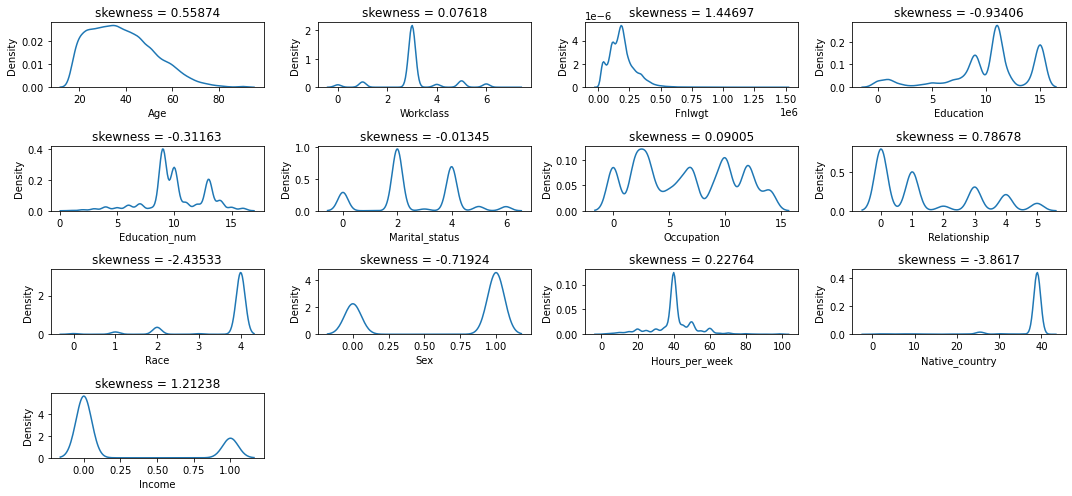

In [26]:
collist = df.columns.values
plt.figure(figsize=(15,7))
for i in range(0,len(collist)):
    plt.subplot(4,4,i+1)
    sns.kdeplot(df[collist[i]])
    plt.title(f"skewness = {round(df[collist[i]].skew(),5)}")
    plt.tight_layout()

Key Observations:

skewness is present in 'Workclass', 'Fnlwgt', 'Relationship', 'Race',' Sex', 'Native_country',' Income'

# Remove skewness by power_transform

In [27]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [28]:
from sklearn.preprocessing import power_transform
x_new = power_transform(x,method='yeo-johnson')

In [29]:
pd.DataFrame(x_new).skew().sort_values(ascending=False)

10    0.229556
1     0.216967
7     0.122917
4     0.023885
2     0.016914
0    -0.013897
5    -0.114201
6    -0.214110
3    -0.309431
9    -0.719244
8    -2.010817
11   -2.643571
dtype: float64

In [30]:
x = pd.DataFrame((x_new),columns=x.columns)

In [31]:
x.shape

(32560, 12)

# Detecting Outliers

Age                   AxesSubplot(0.125,0.71587;0.168478x0.16413)
Workclass          AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Fnlwgt             AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Education          AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Education_num        AxesSubplot(0.125,0.518913;0.168478x0.16413)
Marital_status    AxesSubplot(0.327174,0.518913;0.168478x0.16413)
Occupation        AxesSubplot(0.529348,0.518913;0.168478x0.16413)
Relationship      AxesSubplot(0.731522,0.518913;0.168478x0.16413)
Race                 AxesSubplot(0.125,0.321957;0.168478x0.16413)
Sex               AxesSubplot(0.327174,0.321957;0.168478x0.16413)
Hours_per_week    AxesSubplot(0.529348,0.321957;0.168478x0.16413)
Native_country    AxesSubplot(0.731522,0.321957;0.168478x0.16413)
dtype: object

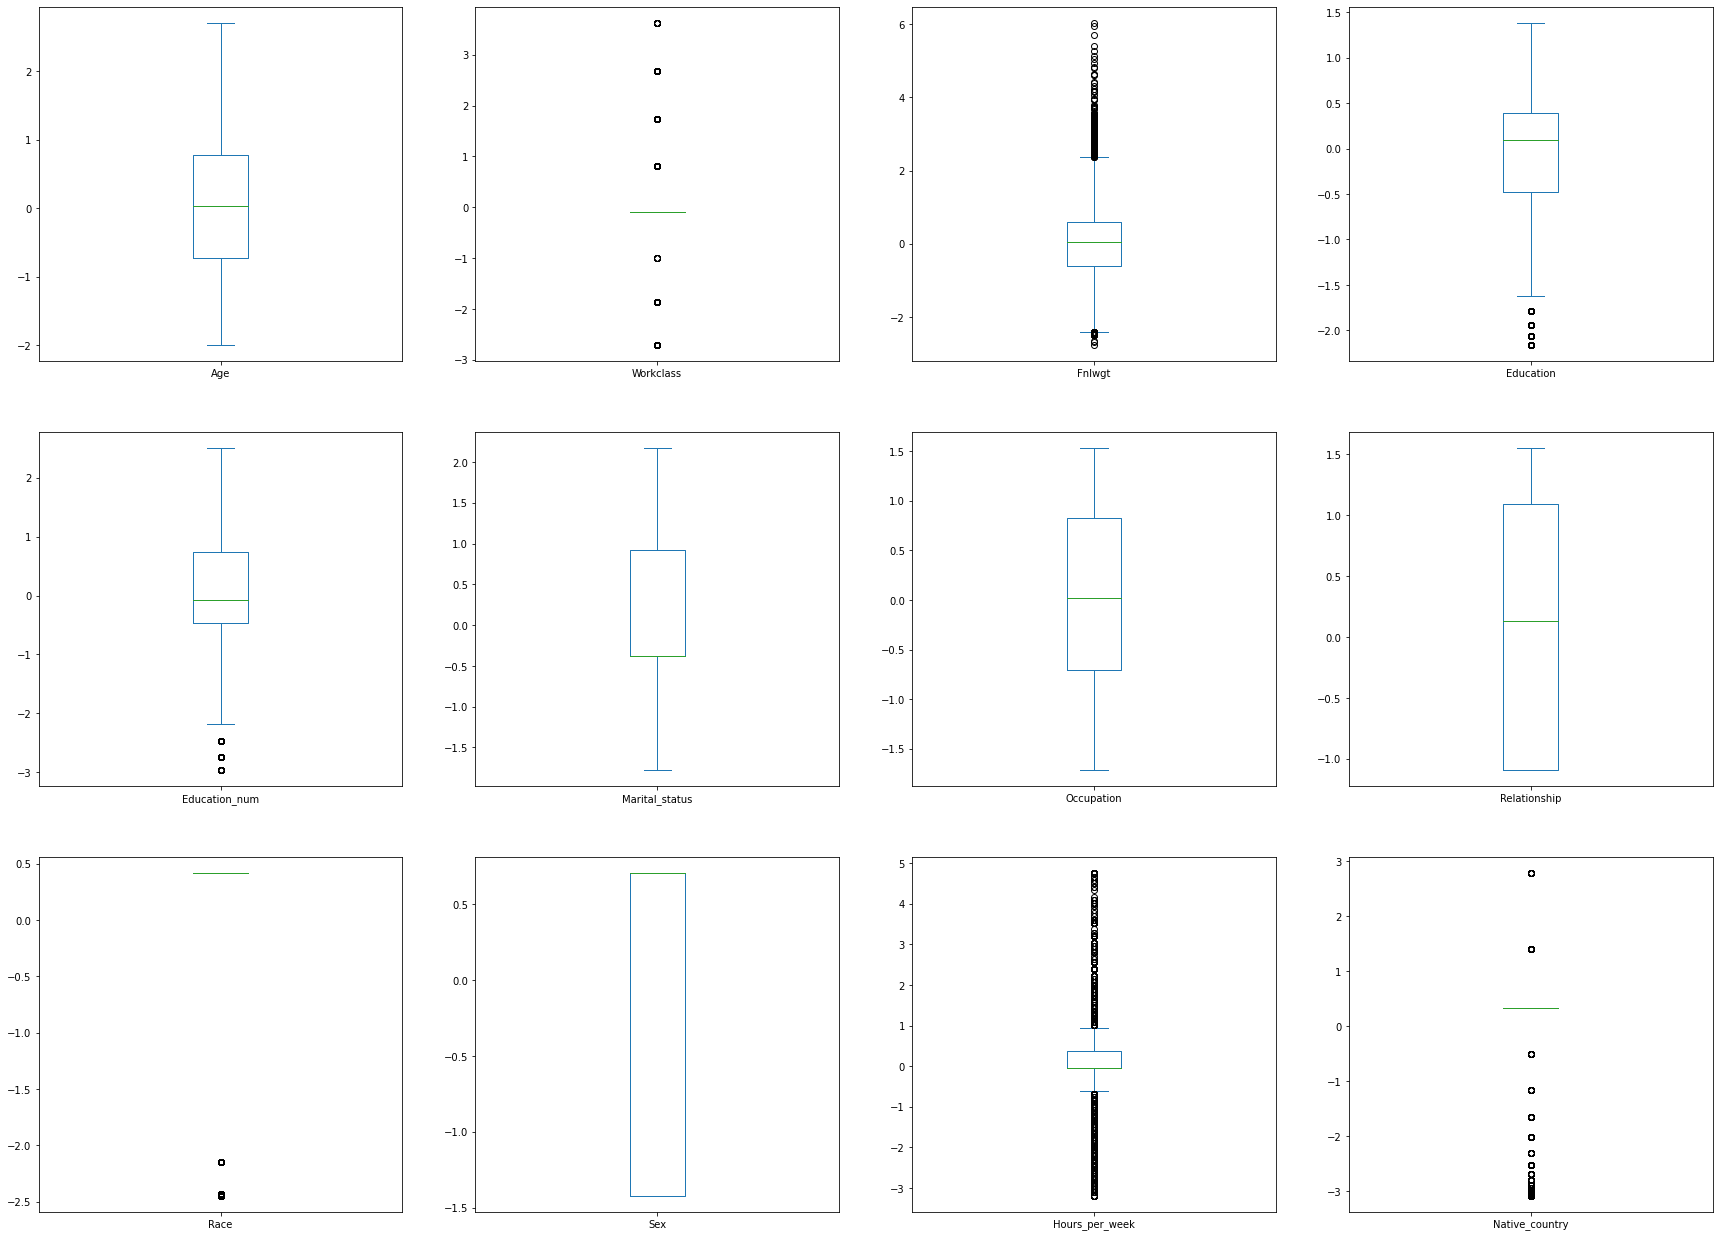

In [32]:
x.plot(kind='box',subplots='True',layout=(4,4),figsize=(30,30))

Here outliers are present in 'Workclass', 'Fnlwgt', 'Education', 'Education_num','Race', 'Hours_per_week','Native_country'

# Removing outliers:

In [33]:
x.shape

(32560, 12)

In [34]:
from scipy.stats import zscore
z = np.abs(zscore(x))
threshold = 3
x_new = x[(z<3).all(axis=1)]

In [35]:
x_new.shape

(29364, 12)

In [36]:
print("Old DataFrame : ",x.shape[0])
print("New DataFrame : ",x_new.shape[0])
print("Rows Dropped  : ",x.shape[0] - x_new.shape[0])

Old DataFrame :  32560
New DataFrame :  29364
Rows Dropped  :  3196


In [37]:
x_new.shape

(29364, 12)

In [38]:
percentage_loss = (32560-30337)/32560*100
percentage_loss

6.827395577395577

There is 6% data loss which is less than 10% so we can drop the outliers

# Scaling data:

In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaled = sc.fit_transform(x_new)

In [40]:
x_scaled.shape

(29364, 12)

In [41]:
x.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Hours_per_week', 'Native_country'],
      dtype='object')

# Multicolinearity:

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [43]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['feature'] = x.columns
vif

,VIF,feature
0,1.261553,Age
1,1.009874,Workclass
2,1.008317,Fnlwgt
3,1.063599,Education
4,1.116998,Education_num
5,1.170627,Marital_status
6,1.022515,Occupation
7,1.934068,Relationship
8,1.072115,Race
9,1.650633,Sex


All columns have less vif value so we no need to remove any column

# Balancing dataset using SMOTE

In [44]:
df['Income'].value_counts()

0    24719
1     7841
Name: Income, dtype: int64

In [45]:
x_scaled.shape

(29364, 12)

In [46]:
from imblearn.over_sampling import SMOTE

smt = SMOTE()
X,y = smt.fit_resample(x,y)

In [47]:
y.value_counts()

0    24719
1    24719
Name: Income, dtype: int64

In [48]:
X.shape

(49438, 12)

In [49]:
y.shape

(49438,)

In [50]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Hours_per_week', 'Native_country', 'Income'],
      dtype='object')

# DataVisualization

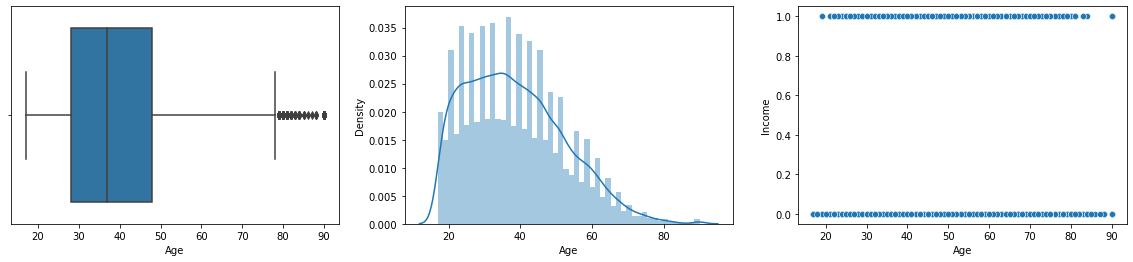

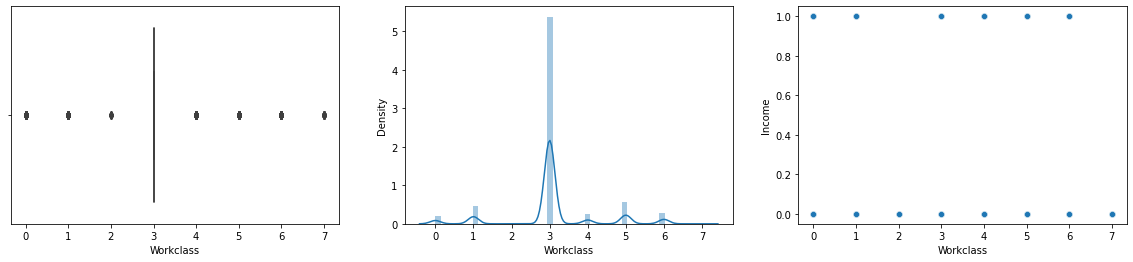

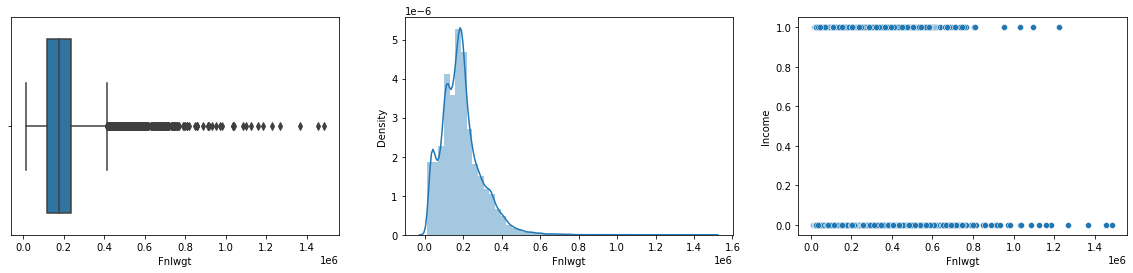

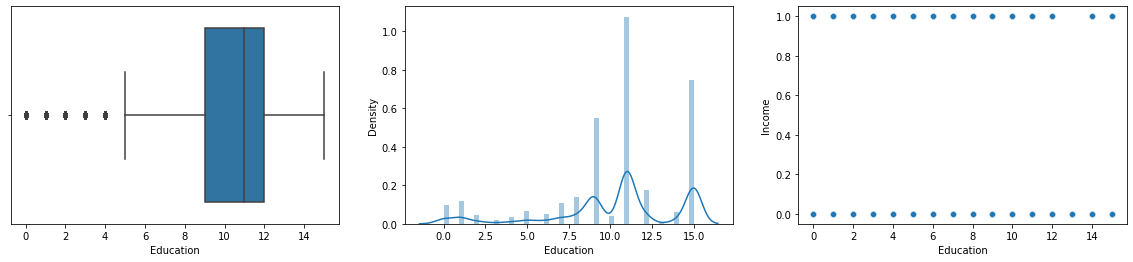

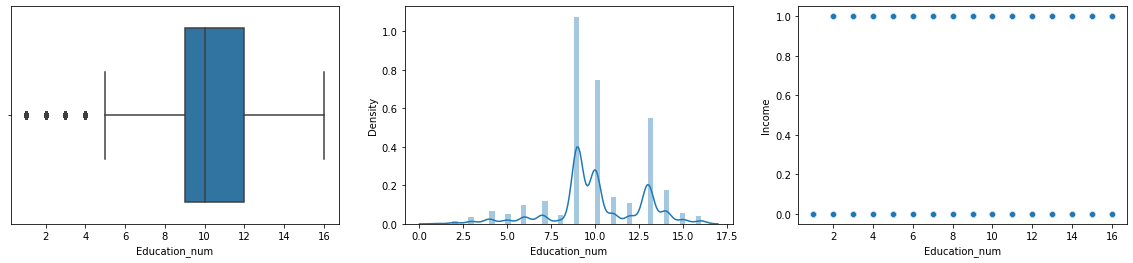

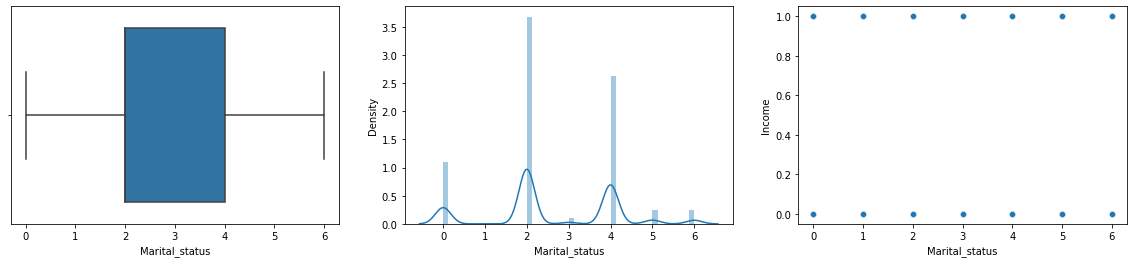

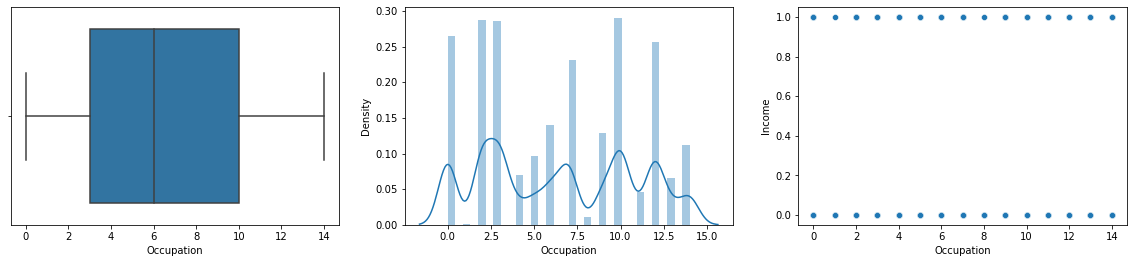

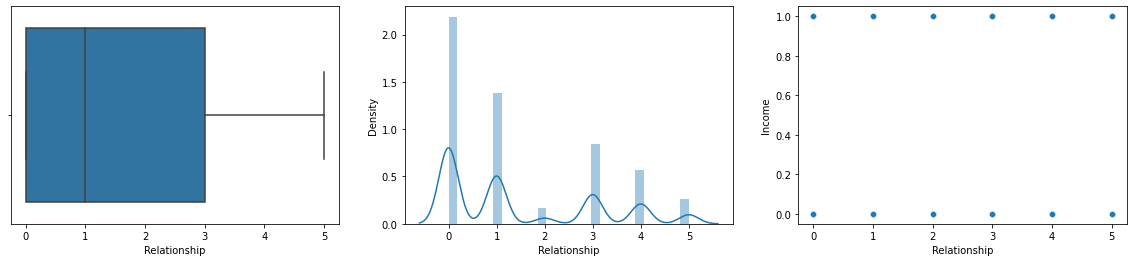

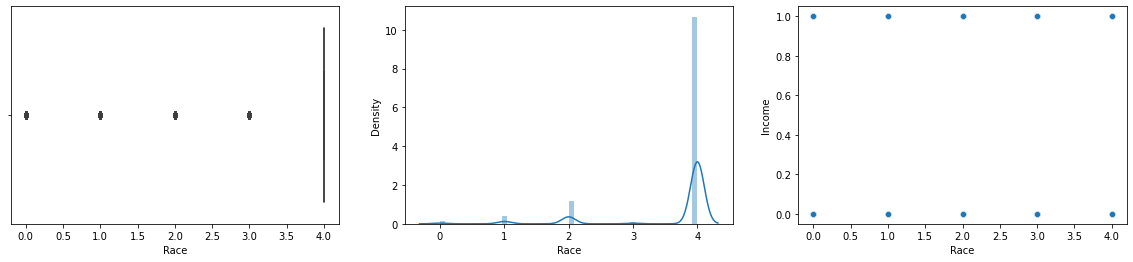

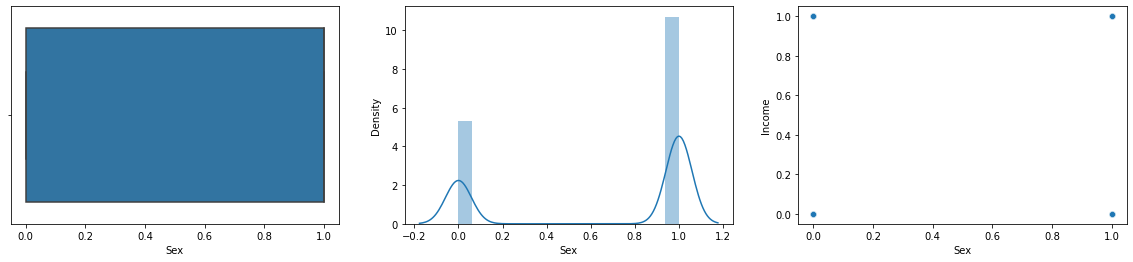

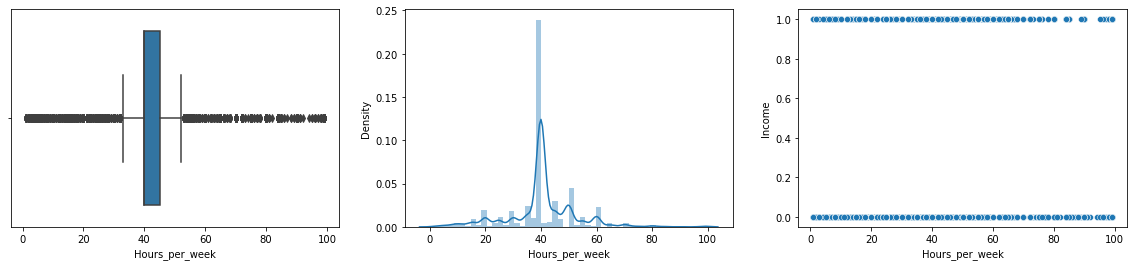

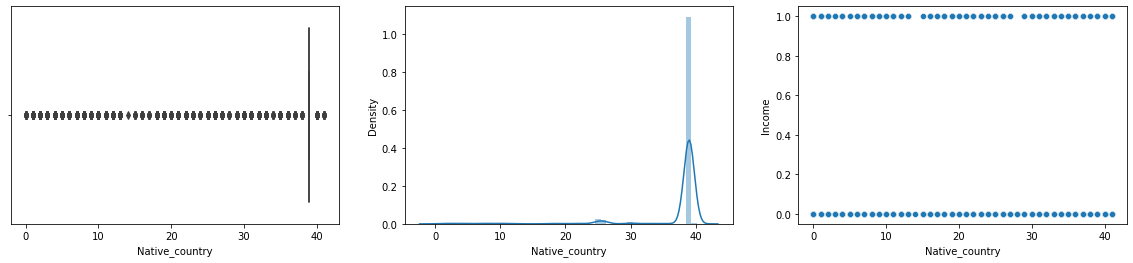

In [51]:
feature_variable = ['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Hours_per_week', 'Native_country']
target_variable = 'Income'


def num_plots(feature_name):
    fig,axs = plt.subplots(1,3,figsize=(20,4))
    a1 = sns.boxplot(x=df[feature_name],ax=axs[0])
    a2 = sns.distplot(df[feature_name],kde=True,ax=axs[1])
    a3 = sns.scatterplot(data=df,x=feature_name,y=target_variable)
    plt.show()
for i in feature_variable:
    num_plots(i)

The above is the visualization of target and feature variable which shows their relationship.

# Training The model

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [53]:
acc = 0

for i in range(0,1000):
    x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=i,test_size=.22)
    lr = LogisticRegression()
    lr.fit(x_train,y_train)
    pred_y= lr.predict(x_test)
    
    temp = accuracy_score(y_test,pred_y)
    if temp > acc:
        acc = temp
        best_rstate = i
print("Accuracy : ",acc*100,"RandomState : ",best_rstate)
    

Accuracy :  77.47540682173394 RandomState :  171


In [54]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=320,test_size=.22)

In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier


In [56]:
lr = LogisticRegression()
kn = KNeighborsClassifier()
gnb = GaussianNB()
dtc = DecisionTreeClassifier()
svc = SVC()
rfc = RandomForestClassifier()
ada = AdaBoostClassifier()

model = [lr,kn,gnb,dtc,svc,rfc,ada]

In [57]:

mean_squared_err = []
mean_absolute_err = []
r2 = []

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm = m.predict(x_test)
    
    
    print("Accuracy Score ",m," is ", accuracy_score(y_test,predm))
    print("Mean Squared Error is ", mean_squared_error(y_test,predm))
    mean_squared_err.append(mean_squared_error(y_test,predm))
    print("Mean Accuracy Error is ",mean_absolute_error(y_test,predm))
    mean_absolute_err.append(mean_absolute_error(y_test,predm))
    print("R2 Score is ",r2_score(y_test,predm))
    r2.append(r2_score(y_test,predm))
    
    print("Confusion Matrix is",confusion_matrix(y_test,predm))
    print("Classification report is ",classification_report(y_test,predm))
    print("\n\n")
    

Accuracy Score  LogisticRegression()  is  0.7704330238117127
Mean Squared Error is  0.22956697618828723
Mean Accuracy Error is  0.22956697618828723
R2 Score is  0.08172364278877431
Confusion Matrix is [[4108 1347]
 [1150 4272]]
Classification report is                precision    recall  f1-score   support

           0       0.78      0.75      0.77      5455
           1       0.76      0.79      0.77      5422

    accuracy                           0.77     10877
   macro avg       0.77      0.77      0.77     10877
weighted avg       0.77      0.77      0.77     10877




Accuracy Score  KNeighborsClassifier()  is  0.8494070056081641
Mean Squared Error is  0.150592994391836
Mean Accuracy Error is  0.150592994391836
R2 Score is  0.39762247772847914
Confusion Matrix is [[4222 1233]
 [ 405 5017]]
Classification report is                precision    recall  f1-score   support

           0       0.91      0.77      0.84      5455
           1       0.80      0.93      0.86      5422



Here we have RandomForestClassifier with 88% accuracy. Further lets cross validate to check its accuracy

# Cross Validation:

In [58]:
mean = []
std = []

for m in model:
    CV = cross_val_score(m,X,y,cv=5)
    print("Score of ",m,"is", CV)
    print("Mean Score of ",m ,"is",CV.mean())
    mean.append(CV.mean())
    print("Standard Deviation is ",CV.std())
    std.append(CV.std())
    print("\n")
    

Score of  LogisticRegression() is [0.75728155 0.76213592 0.76304612 0.76787701 0.7673713 ]
Mean Score of  LogisticRegression() is 0.7635423796178369
Standard Deviation is  0.0038696760707296134


Score of  KNeighborsClassifier() is [0.83131068 0.83930016 0.85639159 0.85485992 0.86446849]
Mean Score of  KNeighborsClassifier() is 0.8492661676458544
Standard Deviation is  0.012123474458256156


Score of  GaussianNB() is [0.75627023 0.76243932 0.75970874 0.76635987 0.76221301]
Mean Score of  GaussianNB() is 0.7613982316519715
Standard Deviation is  0.0033321575768849683


Score of  DecisionTreeClassifier() is [0.74433657 0.80248786 0.86306634 0.87185193 0.87266107]
Mean Score of  DecisionTreeClassifier() is 0.8308807547127198
Standard Deviation is  0.05050979312624451


Score of  SVC() is [0.81270227 0.81411812 0.82514159 0.82502276 0.82532619]
Mean Score of  SVC() is 0.8204621834333142
Standard Deviation is  0.0057761161727551275


Score of  RandomForestClassifier() is [0.8121966  0.85821

We have RandomForestClassifier with 88% accuracy. WE further hypertune to improve accuracy

# Hypertuning

In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

In [60]:
param_grid = [{'n_estimators':[20,50,100],
              'criterion':['gini','entropy'],
              'max_features':['auto','sqrt','log2']}]

rf = RandomForestClassifier(random_state=42,n_jobs=-1)

In [61]:
rf_random = GridSearchCV(rf,param_grid,cv=5)

In [62]:
rf_random.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'n_estimators': [20, 50, 100]}])

In [63]:
rf_random.best_params_

{'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 100}

In [64]:
rf_random.best_score_

0.8793340868975319

In [65]:
preds = cross_val_predict(rf_random.best_estimator_,x_train,y_train,cv=5,n_jobs=-1)

we have better model before hypertuning so we can that as final accuracy

In [66]:
predy = rfc.predict(x_test)
predy

array([1, 0, 1, ..., 0, 0, 1])

# AUC-ROC Curve

In [67]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [68]:
y_pred_proba = rfc.predict_proba(x_test)[:,-1]

In [69]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred_proba)

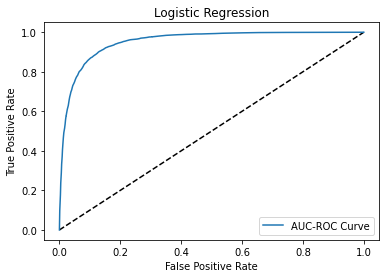

In [70]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='AUC-ROC Curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression")
plt.legend(loc="lower right")
plt.show()

In [71]:
auc_score = roc_auc_score(y_test,rfc.predict(x_test))
print(auc_score)

0.885670458237665


we have auc_roc with accuracy of 88%

# saving best model

In [72]:
import joblib
joblib.dump(predy,"Census_Income_Prediction.obj")

['Census_Income_Prediction.obj']

Conclusion:

In [ ]:
It is true that people who are highly educated, who works more number of hours and Age is main factor affecting the Income earned per individuaL, Whereas Relationship, Marital_Status does not play any role in income of Individual.